In [1]:
import os
os.chdir ("D:/E-Commerce/criteo/O'Reilly/Chapter 6")

## Importing Librares

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### The dataset we will be working with is from the marketing department of a bank and has data about whether the customers subscribed to a term deposit, given some information about the customer and how the bank has engaged and reached out to the customers to sell the term deposit.

In [3]:
bank=pd.read_csv("bank.csv",sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
bank.shape

(4119, 21)

In [5]:
bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [6]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## Processing the data

In [7]:
bank['y']=(bank['y']=='yes').astype(int)

In [8]:
bank['y'].head(n=5)

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

## Reducing education category

In [9]:
bank['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

##  Basic category has repeated 3 times . Let's combine these 3 together

In [10]:
bank['education']=np.where(bank['education'] =='basic.9y', 'Basic', bank['education'])
bank['education']=np.where(bank['education'] =='basic.6y', 'Basic', bank['education'])
bank['education']=np.where(bank['education'] =='basic.4y', 'Basic', bank['education'])
bank['education']=np.where(bank['education'] =='university.degree', 'University Degree', bank['education'])
bank['education']=np.where(bank['education'] =='professional.course', 'Professional Course', bank['education'])
bank['education']=np.where(bank['education'] =='high.school', 'High School', bank['education'])
bank['education']=np.where(bank['education'] =='illiterate', 'Illiterate', bank['education'])
bank['education']=np.where(bank['education'] =='unknown', 'Unknown', bank['education'])

In [11]:
bank['education'].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

## Data Exploration

In [12]:
bank['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [13]:
bank.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [14]:
bank.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


## Data visualization

Text(0,0.5,'Frequency of Purchase')

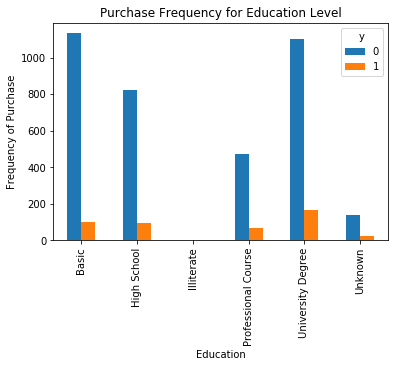

In [15]:
%matplotlib inline
pd.crosstab(bank.education,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Education Level')
plt.xlabel('Education')
plt.ylabel('Frequency of Purchase')

#### The frequency of purchase of the deposit depends a great deal on the Education Level. Thus, the Education Level can be a good predictor of the outcome variable.

Text(0,0.5,'Proportion of Customers')

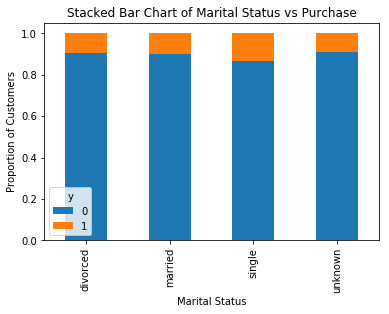

In [16]:
table=pd.crosstab(bank.marital,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

#### The frequency of the purchase of the deposit is more or less the same for each marital status; hence, it might not be very helpful in predicting the outcome.

Text(0,0.5,'Frequency of Purchase')

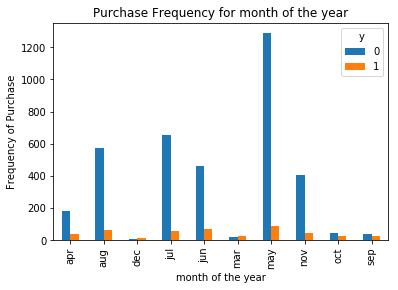

In [17]:
%matplotlib inline
pd.crosstab(bank.month,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for month of the year')
plt.xlabel('month of the year')
plt.ylabel('Frequency of Purchase')

### The plot varies depending on the month of the year. hence, it might be a good predictor of the outcome

Text(0,0.5,'Frequency')

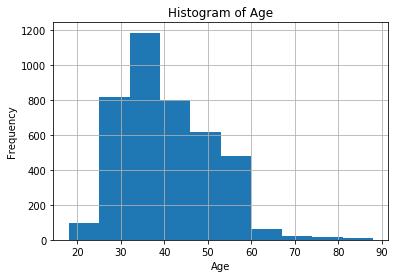

In [18]:
bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

#### The Histogram of Age variable looks as follows, suggesting that the most of the customers of the bank in this dataset are in the age range of 30-40

Text(0,0.5,'Frequency of Purchase')

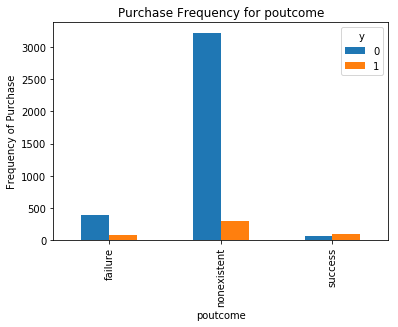

In [19]:
%matplotlib inline
pd.crosstab(bank.poutcome,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for poutcome')
plt.xlabel('poutcome')
plt.ylabel('Frequency of Purchase')

# Creating dummy variables for categorical variables

In [20]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(bank[var], prefix=var)
    bank1=bank.join(cat_list)
    bank=bank1

In [21]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,0,0,1,0,0,0,0,0,1,0
1,39,services,single,High School,no,no,no,telephone,may,fri,...,0,0,1,0,0,0,0,0,1,0
2,25,services,married,High School,no,yes,no,telephone,jun,wed,...,0,0,0,0,0,0,1,0,1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,0,0,1,0,0,0,0,0,1,0
4,47,admin.,married,University Degree,no,yes,no,cellular,nov,mon,...,0,0,0,1,0,0,0,0,1,0
5,32,services,single,University Degree,no,no,no,cellular,sep,thu,...,0,1,0,0,1,0,0,1,0,0
6,32,admin.,single,University Degree,no,yes,no,cellular,sep,mon,...,0,1,0,1,0,0,0,0,1,0
7,41,entrepreneur,married,University Degree,unknown,yes,no,cellular,nov,mon,...,0,0,0,1,0,0,0,0,1,0
8,31,services,divorced,Professional Course,no,no,no,cellular,nov,tue,...,0,0,0,0,0,1,0,1,0,0
9,35,blue-collar,married,Basic,unknown,no,no,telephone,may,thu,...,0,0,0,0,1,0,0,0,1,0


### The actual categorical variable needs to be removed once the dummy variables have been created

In [22]:
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
bank_vars=bank.columns.values.tolist()
to_keep=[i for i in bank_vars if i not in cat_vars]

## subset the bank data frame to keep only the columns present in the to_keep list

In [23]:
bank_final=bank[to_keep]
bank_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [24]:
bank_final_vars=bank_final.columns.values.tolist()
Y=['y']
X=[i for i in bank_final_vars if i not in Y ]

## Feature selection

#### perform a feature selection to decide the significant variables that can predict the outcome with great accuracy

In [25]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 12) # Selecting 12 columns
rfe = rfe.fit(bank_final[X],bank_final[Y] )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True False  True False False False False False False  True False
  True]
[36 42 18 44  1 14 30 29  1 39 23  3  1 38  2 40  1  5 32 34 12 47 19 43
 33 50 31 13 48 22 41  8 37 35 49 20  6 10 15  9 24 16  4 45 25  1  1  1
  1  1 17  1 46 26 21 28 27 11  1  7  1]


#### The columns that have True in the support array are selected for the model, or the columns that have the value 1 in the rank array are selected for the model. The outcome of feature selection process. The columns with True/1 in the respective positions should be selected for the final model

### fit a logistic regression model using the preceding selected variables as predictor variables, with the y as the outcome variable

In [26]:
cols=['previous', 'euribor3m', 'job_entrepreneur', 'job_self-employed', 'poutcome_success', 'poutcome_failure', 'month_oct', 'month_may',
    'month_mar', 'month_jun', 'month_jul', 'month_dec'] 
X=bank_final[cols]
Y=bank_final['y']

## Implementing the model

In [27]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## The accuracy of this model can be calculated as follows

In [28]:
clf.score(X,Y)

0.9021607186210245

The value comes out to be .902. Our model takes this accuracy to 90.2. For a little bit of enhancement, maybe, we can try reducing the number of columns, training-testing split, and cross validation to increase this score.

In [29]:
pd.DataFrame(list(zip(X.columns, np.transpose(clf.coef_))))

,0,1
0,previous,[0.37983161534945126]
1,euribor3m,[-0.5027490707708038]
2,job_entrepreneur,[-0.34306615539508595]
3,job_self-employed,[-0.3350641648715643]
4,poutcome_success,[1.077832533810502]
5,poutcome_failure,[-0.7531618699865469]
6,month_oct,[0.41185574263383806]
7,month_may,[-0.743089627442417]
8,month_mar,[1.2703612281583385]
9,month_jun,[0.5096949881681545]


# Model validation and evaluation
The logistic regression model is built on the entire data. Now split data into training and testing sets.
The ultimate goal is to see whether it improves the accuracy of the prediction or not

In [30]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
from sklearn import linear_model
from sklearn import metrics
clf1 = linear_model.LogisticRegression()
clf1.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The model predicts probabilities and not the binary output. select a threshold over these probabilities to classify them into two categories. Something of this sort: if the probability is less than the threshold, then it is a 0 outcome, and if it is greater than the threshold, then it is a 1 outcome.

Let us see how we can get those probabilities and classifications

In [32]:
probs = clf1.predict_proba(X_test)
probs

array([[0.93352157, 0.06647843],
       [0.88259365, 0.11740635],
       [0.93040666, 0.06959334],
       ...,
       [0.73273217, 0.26726783],
       [0.97862459, 0.02137541],
       [0.24746608, 0.75253392]])

This gives the probability of a negative and positive outcome for each row of the data

By default, if this probability is more than 0.5, then the observation is categorized as a positive outcome, and as a negative outcome if it is less than that.

The default outcome for predicting the class can be found out using the following code

In [33]:
predicted = clf1.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 1])

we can use different cutoffs for this as well. In this case, we have seen that only 10% of the customers buy the product. hence, probability=0.10 can be a good threshold. If an observation has a probability of more than 0.10, we can classify it as a positive outcome (a customer will buy the product). An observation with the probability less than 0.10 will be classified as a negative outcome.

The changing of threshold values can be done using the following code snippet:

In [34]:
prob=probs[:,1]
prob_df=pd.DataFrame(prob)
prob_df['predict']=np.where(prob_df[0]>=0.10,1,0)
prob_df.head() 

,0,predict
0,0.066478,0
1,0.117406,1
2,0.069593,0
3,0.062666,0
4,0.065086,0


The number of positive and negative responses will change with the threshold values




Let us check the accuracy of this model using the following code snippet

In [35]:
metrics.accuracy_score(Y_test, predicted)

0.9021035598705501

This model has the same accuracy of 90.21% as the previous model

# Cross validation

Splitting up a dataset in the training and testing dataset is the simplest way to do cross validation. This is called a holdout method, wherein the training set and testing set are randomly chosen

In [36]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring='accuracy', cv=8)
print (scores)

[0.91860465 0.90310078 0.89534884 0.90679612 0.89883268 0.89299611
 0.90466926 0.89883268]


Basically runs an 8-fold cross validation method and calculates the accuracy for each of the iterations. The average accuracy is also printed as below

In [37]:
print (scores.mean())

0.9023976399212946


The average accuracy remains very close to the accuracy we have observed before; hence, we can conclude that the model generalizes well

# Model validation
Once the model has been built and evaluated, the next step is to validate the model

In [40]:
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
clf1 = linear_model.LogisticRegression()
clf1.fit(X_train, Y_train)
probs = clf1.predict_proba(X_test)

we have chosen a threshold probability of 0.05 in the following case

In [41]:
prob=probs[:,1]
prob_df=pd.DataFrame(prob)
prob_df['predict']=np.where(prob_df[0]>=0.05,1,0)
prob_df['actual']=Y_test
prob_df.head()

,0,predict,actual
0,0.066478,1,NaN
1,0.117406,1,0.0
2,0.069593,1,0.0
3,0.062666,1,NaN
4,0.065086,1,0.0


# Confusion matrix

In [42]:
confusion_matrix=pd.crosstab(prob_df['actual'],prob_df['predict'])
confusion_matrix

predict,0,1
actual,,
0.0,116,222
1.0,14,21


Let us plot our ROC curve and also the diagonal line and see whether the ROC curve lies above the diagonal line or below

Text(0.5,1,'ROC Curve')

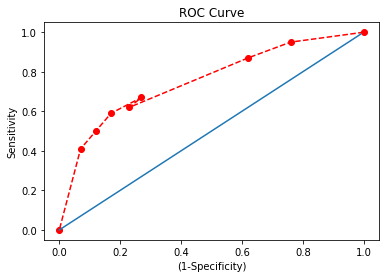

In [43]:
%matplotlib inline
Sensitivity=[1,0.95,0.87,0.62,0.67,0.59,0.5,0.41,0]
FPR=[1,0.76,0.62,0.23,0.27,0.17,0.12,0.07,0]
plt.plot(FPR,Sensitivity,marker='o',linestyle='--',color='r')
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel('(1-Specificity)')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')

The ROC curve lies above the diagonal line and, hence, the model is a better predictor than a random guess. However, there can be many ROC curves lying above the diagonal line. How to determine one ROC curve is better than the other? This is determined by calculating the area enclosed under the ROC curves. The more the area enclosed by the ROC curve, the better it is. The area under the curve can lie between 0 and 1. The closer it is to 1, the better it is

###### Draw an ROC curve and calculate the area under the curve

C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\asd\Anaconda2\envs\py36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


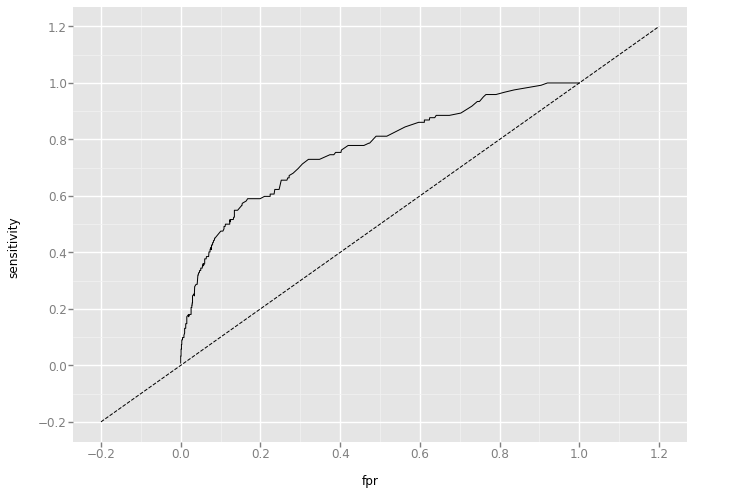

<ggplot: (19137414)>

In [44]:
from sklearn import metrics
from ggplot import *

prob = clf1.predict_proba(X_test)[:,1]
fpr, sensitivity, _ = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame(dict(fpr=fpr, sensitivity=sensitivity))
ggplot(df, aes(x='fpr', y='sensitivity')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

###### The area under the curve can be found out as follows

In [45]:
auc = metrics.auc(fpr,sensitivity)
auc

0.764351620213674

The area under the curve comes out to be 0.76, which is pretty good.